# Image Binary Classification

## Import Dependentent Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os

## Loading Dataset and images

In [6]:
IMG_PATH = './data/images/'
images = [cv2.imread(file) for file in glob.glob(os.path.join(IMG_PATH, '*.jpg'))]

In [39]:
train_df = pd.read_csv('./data/train.csv', header=0)
test_df = pd.read_csv('./data/test.csv', header=0)

In [40]:
train_df.info()
print("---"*30)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.8+ KB
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_names  706 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


In [21]:
train_df.isnull().sum()

image_names         0
emergency_or_not    0
dtype: int64

In [66]:
def load_img_pixels(image_list):
    IMG_PATH = './data/images/'

    try:
        file_objs = [glob.glob(os.path.join(IMG_PATH, name)) for name in image_list]
#         print([cv2.imread(file[0]) for file in file_objs])
        images = [cv2.imread(file[0]).flatten() for file in file_objs]
        return images
    except Exception as e:
        raise Exception('Error loading images {}'.format(e))

train_df['image_pixels'] = load_img_pixels(train_df['image_names'].values)
test_df['image_pixels'] = load_img_pixels(test_df['image_names'].values)

In [81]:
train_df['image_pixels'][0]

array([72, 96, 94, ..., 64, 66, 67], dtype=uint8)

In [82]:
img_original = train_df['image_pixels'][0].reshape(224,224,3)

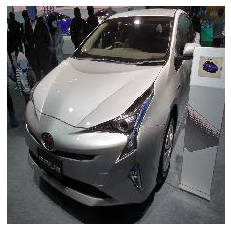

In [83]:
# Plot the images
plt.imshow(img_original, cmap='binary')
plt.axis('off')
plt.show()

## Train for Binary Classifier

In [84]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [85]:
X = train_df['image_pixels']
y = train_df['emergency_or_not']

In [ ]:
clf_pipeline = make_pipeline(StandardScaler(), SGDClassifier(max_iter=100, tol=1e-3,random_state=42))
clf_pipeline.fit(list(X), y)

In [93]:
predicts = clf_pipeline.predict(list(test_df['image_pixels']))

In [95]:
len(predicts)

706

## Submission preparation

In [97]:
submit_file = pd.read_csv('./sample_submission.csv', header=0)

In [105]:
submit_file['emergency_or_not'] = predicts

In [113]:
submit_file.to_csv('submission_venkat_01.csv', index=False)